# Comparativas de Precios

In [1]:
# Librerías de extracción de datos
# -----------------------------------------------------------------------
# (Aquí puedes añadir librerías para scraping si las necesitas, como BeautifulSoup o requests)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd             # Para manipular estructuras de datos como DataFrames
import numpy as np              # Para cálculos numéricos y manejo de arrays

# Manejo del tiempo y generación de pausas
# -----------------------------------------------------------------------
from time import sleep          # Pausar la ejecución del código durante un tiempo definido
import random                   # Generar valores aleatorios, útil para espaciar solicitudes web y evitar bloqueos

# Importación de módulos desde rutas recursivas
# -----------------------------------------------------------------------
import sys
sys.path.append("../")  # Añadir rutas externas para poder importar módulos desde carpetas superiores
from src.SupportAlojamientos import obtain_html, make_df  # Funciones personalizadas de apoyo para scraping de alojamientos

# Manejo de advertencias
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')  # Ignorar advertencias para tener una salida limpia

# Librerías para visualización de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt     # Para crear gráficos y visualizaciones básicas
import seaborn as sns               # Para visualizaciones estadísticas más avanzadas


In [2]:
actividades_monaco = pd.read_csv("../datos/actividades/actividades_mónaco.csv",index_col="Unnamed: 0")
actividades_oslo = pd.read_csv("../datos/actividades/actividades_oslo.csv",index_col="Unnamed: 0")

# Comparativa de las actividades

In [3]:
actividades_monaco.sample()

,Actividad,Calificación,URL
27,La Collection De Voitures De S.A.S. Le Prince ...,4.5,https://www.tripadvisor.es//Attraction_Review-...


# 1. Distribución de calificaciones en cada ciudad

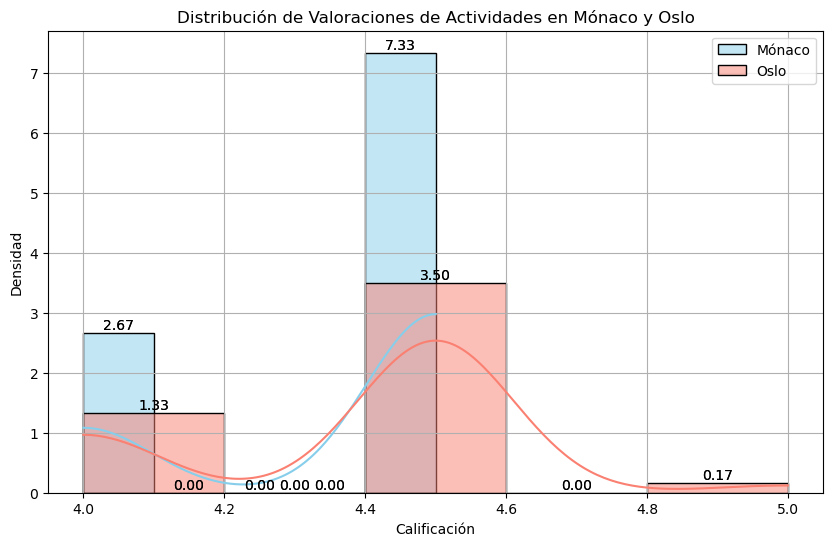

In [14]:
plt.figure(figsize=(10, 6))
monaco = sns.histplot(actividades_monaco['Calificación'], bins=5, kde=True, color="skyblue", label="Mónaco", stat="density")
oslo = sns.histplot(actividades_oslo['Calificación'], bins=5, kde=True, color="salmon", label="Oslo", stat="density")

# Añadir los números encima de cada barra para Mónaco
for p in monaco.patches:
    monaco.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

# Añadir los números encima de cada barra para Oslo
for p in oslo.patches:
    oslo.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom')

plt.xlabel("Calificación")
plt.ylabel("Densidad")
plt.title("Distribución de Valoraciones de Actividades en Mónaco y Oslo")
plt.grid(visible=True)
plt.legend()
plt.show()


En la gráfica de distribución de calificaciones de actividades en Mónaco y Oslo, observamos una tendencia clara hacia calificaciones altas en ambos destinos. 

1. Concentración de Calificaciones:

- **La mayoría de las actividades** en ambas ciudades tienen calificaciones altas, situándose entre 4.0 y 4.5. Esto indica una oferta turística de calidad similar en ambos lugares, con actividades generalmente bien valoradas.
- **La densidad más alta** en cada destino está alrededor de la calificación de 4.5, lo que sugiere que los visitantes de ambos destinos suelen encontrar experiencias satisfactorias.

2. Comparación entre Mónaco y Oslo:

- Aunque ambas ciudades tienen una distribución de calificaciones similar, Mónaco muestra una leve mayor concentración en calificaciones justo por encima de 4.0, mientras que Oslo parece estar ligeramente más concentrado en 4.5.
- Esto puede indicar que las actividade de Oslo están ligeramente mejor valoradas en términos de experiencia general.

3. Rangos de Calificación Menores:

- Notamos muy pocas o ninguna actividad en rangos de calificación inferiores a 4.0, lo que sugiere que, en general, las opciones de actividades en ambas ciudades mantienen un estándar de calidad alto.
- Es poco común encontrar actividades turísticas en estos destinos con calificaciones bajas, lo cual es positivo para quienes buscan experiencias confiables y bien valoradas.

# 2. Actividades con mejor calificación en ambas ciudades

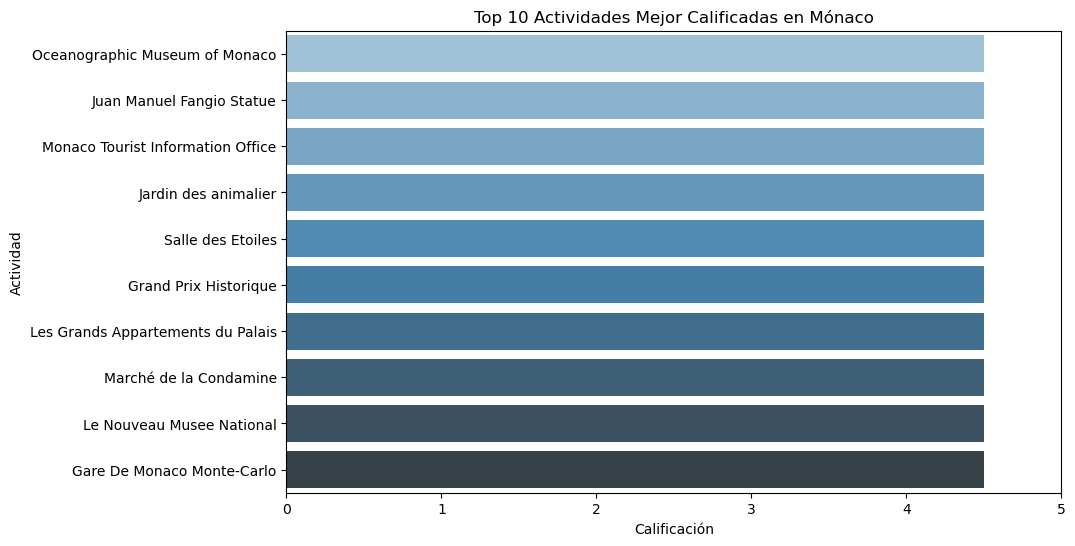

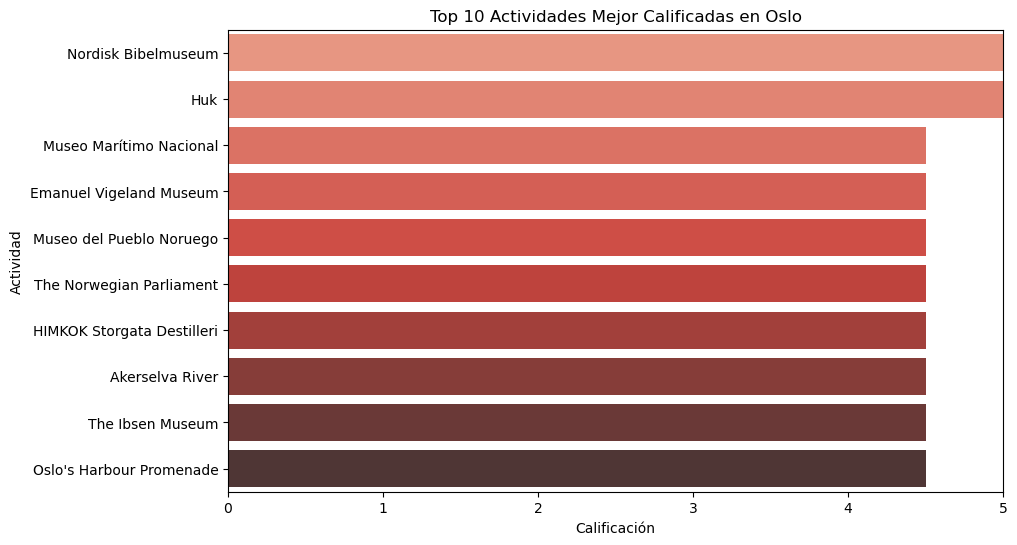

In [5]:
top_monaco = actividades_monaco.sort_values(by="Calificación", ascending=False).head(10)
top_oslo = actividades_oslo.sort_values(by="Calificación", ascending=False).head(10)

# Gráfico para Mónaco
plt.figure(figsize=(10, 6))
sns.barplot(y="Actividad", x="Calificación", data=top_monaco, palette="Blues_d")
plt.title("Top 10 Actividades Mejor Calificadas en Mónaco")
plt.xlabel("Calificación")
plt.ylabel("Actividad")
plt.xlim(0, 5)
plt.show()

# Gráfico para Oslo
plt.figure(figsize=(10, 6))
sns.barplot(y="Actividad", x="Calificación", data=top_oslo, palette="Reds_d")
plt.title("Top 10 Actividades Mejor Calificadas en Oslo")
plt.xlabel("Calificación")
plt.ylabel("Actividad")
plt.xlim(0, 5)
plt.show()

# 3. Calificación promedio entre Mónaco y Oslo

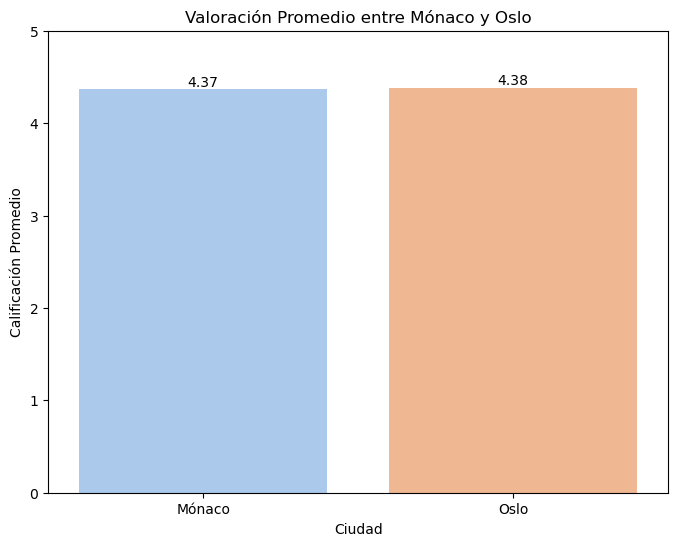

In [6]:
promedio_calificacion = pd.DataFrame({
    "Ciudad": ["Mónaco", "Oslo"],
    "Calificación Promedio": [actividades_monaco["Calificación"].mean(), actividades_oslo["Calificación"].mean()]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Ciudad", y="Calificación Promedio", data=promedio_calificacion, palette="pastel")
plt.title("Valoración Promedio entre Mónaco y Oslo")
plt.ylim(0, 5)
plt.xlabel("Ciudad")
plt.ylabel("Calificación Promedio")

# Agregar los valores promedio encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


Puntos clave:
1. **Calificaciones Promedio Altas**
- Tanto Mónaco como Oslo presentan calificaciones promedio superiores a 4.0, lo cual refuerza la idea de que ambos destinos ofrecen actividades de calidad que satisfacen a sus visitantes.
2. **Diferencia en la Calificación Promedio**
- Aunque la diferencia entre ambas ciudades es leve, Oslo tiene una calificación promedio ligeramente superior a Mónaco. Lo que sugiere que las actividades en Oslo han recibido una valoración mejor de los visitantes. Lo que puede reflejar experiencias más atractivas o mejor valoradas en Oslo, aunque ambos destinos son muy parecidos en valoración.

# Comparativas Precios Alojamientos

In [7]:
alojamientos_monaco =  pd.read_csv("../datos/alojamientos/alojamientos_mónaco.csv",index_col="Unnamed: 0")
alojamientos_oslo = pd.read_csv("../datos/alojamientos/alojamientos_oslo.csv",index_col="Unnamed: 0")

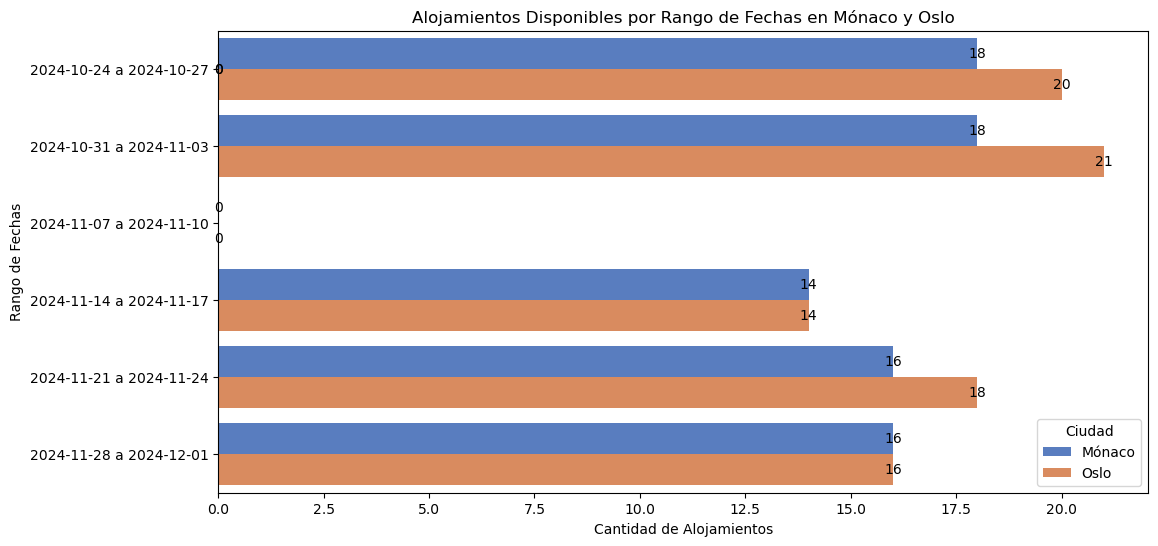

In [15]:
alojamientos_monaco["Ciudad"] = "Mónaco"
alojamientos_oslo["Ciudad"] = "Oslo"

alojamientos_monaco["Fecha entrada"] = pd.to_datetime(alojamientos_monaco["Fecha entrada"], errors='coerce')
alojamientos_monaco["Fecha salida"] = pd.to_datetime(alojamientos_monaco["Fecha salida"], errors='coerce')
alojamientos_oslo["Fecha entrada"] = pd.to_datetime(alojamientos_oslo["Fecha entrada"], errors='coerce')
alojamientos_oslo["Fecha salida"] = pd.to_datetime(alojamientos_oslo["Fecha salida"], errors='coerce')

alojamientos = pd.concat([alojamientos_monaco, alojamientos_oslo], ignore_index=True)

rango_fechas = [
    ('2024-10-24', '2024-10-27'),
    ('2024-10-31', '2024-11-03'),
    ('2024-11-07', '2024-11-10'),
    ('2024-11-14', '2024-11-17'),
    ('2024-11-21', '2024-11-24'),
    ('2024-11-28', '2024-12-01')]

conteos = []
for start, end in rango_fechas:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    count_monaco = alojamientos_monaco[(alojamientos_monaco['Fecha entrada'] >= start_date) & 
                                       (alojamientos_monaco['Fecha salida'] <= end_date)].shape[0]
    
    count_oslo = alojamientos_oslo[(alojamientos_oslo['Fecha entrada'] >= start_date) & 
                                   (alojamientos_oslo['Fecha salida'] <= end_date)].shape[0]
    
    conteos.append([f"{start} a {end}", "Mónaco", count_monaco])
    conteos.append([f"{start} a {end}", "Oslo", count_oslo])

disponibilidad_por_rango = pd.DataFrame(conteos, columns=["Rango", "Ciudad", "Cantidad"])


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=disponibilidad_por_rango, y="Rango", x="Cantidad", hue="Ciudad", palette="muted")
plt.title("Alojamientos Disponibles por Rango de Fechas en Mónaco y Oslo")
plt.xlabel("Cantidad de Alojamientos")
plt.ylabel("Rango de Fechas")

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center')

plt.show()



La gráfica muestra cómo varía la disponibilidad de alojamientos entre ambos destinos en cada periodo específico.

1. **Comparación de Disponibilidad entre Mónaco y Oslo:**

- En la mayoría de los rangos de fechas, Oslo presenta una ligera ventaja en la cantidad de alojamientos disponibles en comparación con Mónaco. 
- Esto sugiere que Oslo podría tener una oferta de alojamiento ligeramente mayor, lo que puede ser atractivo para los viajeros que buscan más opciones en cuanto a precios o ubicación.

2. **Variabilidad entre Rangos de Fechas:**

- Notamos que la disponibilidad no es constante; algunos periodos, como el de 14 al 17 de noviembre, tienen una menor cantidad de alojamientos en ambas ciudades. 
- Esto podría indicar una baja en la oferta de alojamiento en ciertas fechas o una posible demanda anticipada en otras fechas.

3. **Patrones de Demanda Posible:**

- Las fechas hacia finales de octubre y principios de noviembre **(como el rango del 24 al 27 de octubre y del 31 de octubre al 3 de noviembre)** muestran mayor disponibilidad. 
- Este patrón podría estar asociado a una menor demanda estacional o a que estos periodos no coinciden con festividades importantes.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


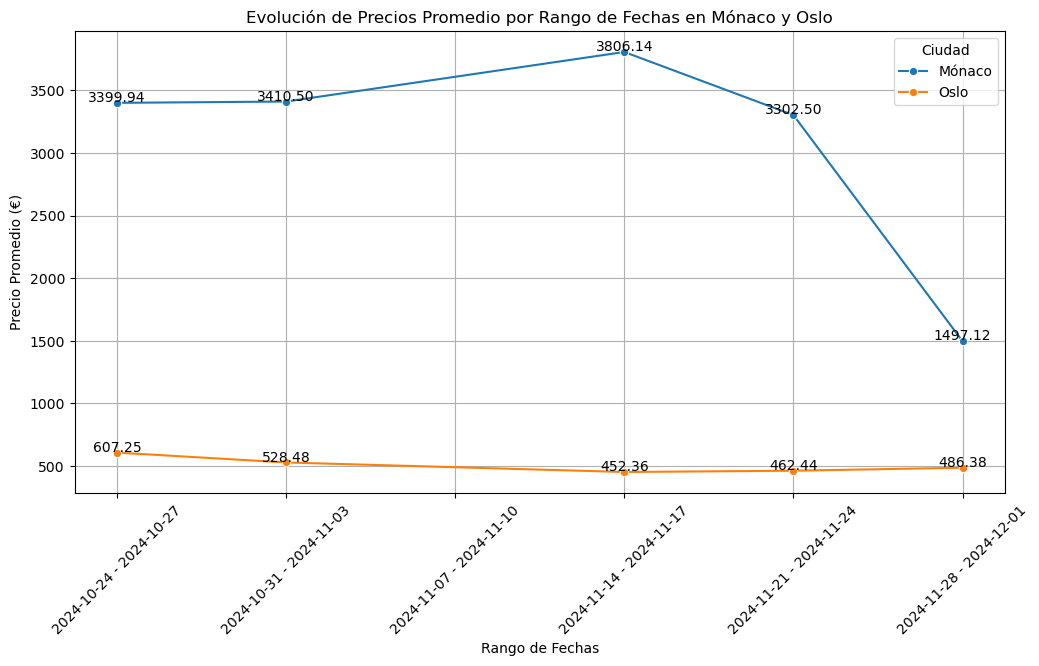

In [9]:
promedio_precio_conteo = []

for start, end in rango_fechas:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    avg_price_monaco = alojamientos_monaco[(alojamientos_monaco['Fecha entrada'] >= start_date) & 
                                           (alojamientos_monaco['Fecha salida'] <= end_date)]['Precio (€)'].mean()
    avg_price_oslo = alojamientos_oslo[(alojamientos_oslo['Fecha entrada'] >= start_date) & 
                                       (alojamientos_oslo['Fecha salida'] <= end_date)]['Precio (€)'].mean()
    
    promedio_precio_conteo.append([f"{start} - {end}", "Mónaco", avg_price_monaco])
    promedio_precio_conteo.append([f"{start} - {end}", "Oslo", avg_price_oslo])

promedio_por_rango = pd.DataFrame(promedio_precio_conteo, columns=["Rango", "Ciudad", "Precio (€)"])

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=promedio_por_rango, x="Rango", y="Precio (€)", hue="Ciudad", marker="o")
plt.title("Evolución de Precios Promedio por Rango de Fechas en Mónaco y Oslo")
plt.xlabel("Rango de Fechas")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)

for x, row in promedio_por_rango.iterrows():
    ax.text(x=row['Rango'], y=row['Precio (€)'] + 10, s=f'{row["Precio (€)"]:.2f}', ha='center')
plt.grid()
plt.show()


1. **Comparación de Precios Promedio:**
- En general, los precios promedio de alojamiento en Mónaco son significativamente más altos que en Oslo. Esto es consistente a lo largo de todos los rangos de fechas, con diferencias bastante notorias.

2. **Tendencias en Mónaco:**
- Los precios en Mónaco muestran variaciones, con un incremento que alcanza un pico en el rango del 7 al 10 de noviembre (3806.14 €).
- Posteriormente, los precios disminuyen, terminando en el rango del 28 de noviembre al 1 de diciembre con un promedio de 1497.12 €.
- Esto podría indicar una fluctuación estacional en la demanda de alojamiento o la disponibilidad de opciones de lujo durante ciertos periodos.

3. **Tendencias en Oslo:**
- Los precios promedio en Oslo se mantienen relativamente estables, sin grandes cambios entre los rangos de fechas. El precio promedio oscila entre 452.36 € y 607.25 €, lo que sugiere una estabilidad en la oferta y demanda de alojamiento en este destino, con opciones más accesibles que en Mónaco.

4. **Conclusión General:**
- Para los viajeros que buscan opciones de alojamiento económico, Oslo sería una mejor opción, especialmente en el contexto de estos rangos de fechas, dada su estabilidad en precios bajos.
- Por otro lado, Mónaco muestra una mayor variabilidad en precios, lo que podría interesar a los viajeros dispuestos a pagar más por experiencias exclusivas, aunque deben tener en cuenta los periodos en los que los precios son más altos.

# Comparativas Vuelos

In [10]:
vuelos_niza = pd.read_csv("../datos/vuelos/vuelos_niza.csv",index_col="Unnamed: 0")
vuelos_oslo = pd.read_csv("../datos/vuelos/vuelos_oslo.csv",index_col="Unnamed: 0")

In [11]:
vuelos = pd.concat([vuelos_niza, vuelos_oslo], ignore_index=True)

# Promedio de Precios por Aerolínea

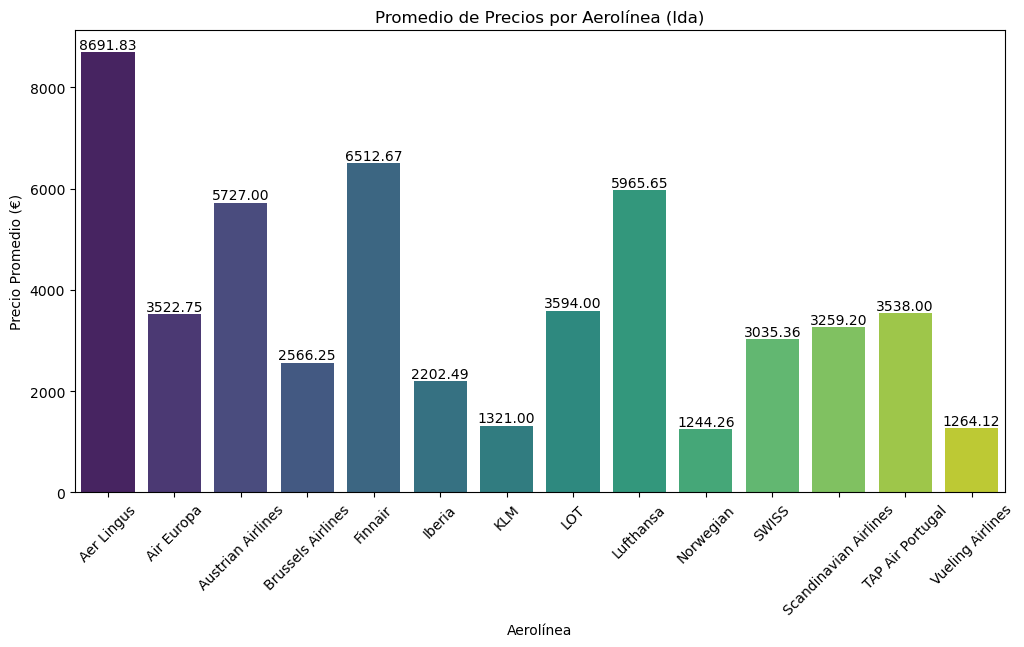

In [12]:
promedio_aerolinea = vuelos.groupby('aerolínea_ida')['precio (€)'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=promedio_aerolinea, x="aerolínea_ida", y="precio (€)", palette="viridis")
plt.title("Promedio de Precios por Aerolínea (Ida)")
plt.xlabel("Aerolínea")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

# Duración Promedio del Vuelo por Aerolínea

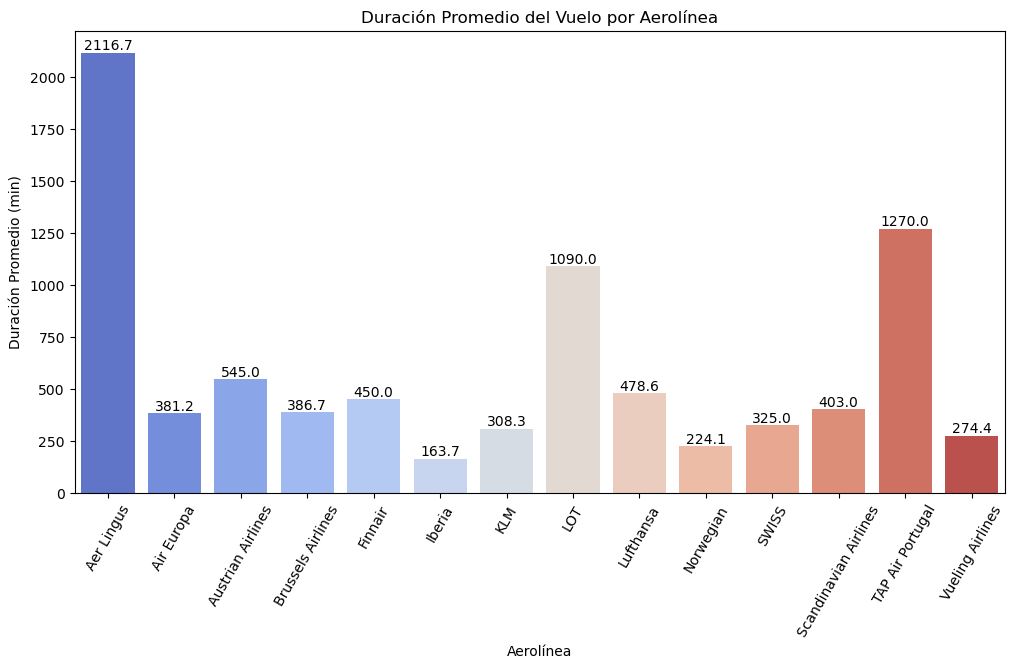

In [16]:
duracion_aerolinea = vuelos.groupby('aerolínea_ida')['duracion_ida (min)'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=duracion_aerolinea, x="aerolínea_ida", y="duracion_ida (min)", palette="coolwarm")
plt.title("Duración Promedio del Vuelo por Aerolínea")
plt.xlabel("Aerolínea")
plt.ylabel("Duración Promedio (min)")
plt.xticks(rotation=60)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

1. Duración Extrema para Aer Lingus:

- La duración promedio para Aer Lingus es notablemente alta, con 2116.7 minutos (alrededor de 35 horas).
- Esto podría deberse a vuelos con múltiples escalas o rutas indirectas.
2. Aerolíneas con Duración Moderada:

- Algunas aerolíneas, como Austrian Airlines (545 minutos) y LOT (1090 minutos), también tienen duraciones relativamente largas, pero mucho más manejables en comparación con Aer Lingus.
- Estas duraciones sugieren que estas aerolíneas podrían incluir una escala o tener rutas menos directas.
3. Aerolíneas con Duraciones Cortas:

- Vueling Airlines y Norwegian tienen las duraciones de vuelo promedio más cortas, con 274.4 y 224.1 minutos respectivamente, lo que sugiere vuelos más directos.
- Esto es ideal para viajeros que buscan reducir el tiempo de viaje.
4. Variabilidad entre Aerolíneas:

- El gráfico muestra una amplia variabilidad en la duración promedio según la aerolínea. - Esto puede ayudar a los clientes a elegir en función de su preferencia por vuelos más directos (aerolíneas como Vueling y Norwegian) o rutas más económicas que pueden incluir escalas.

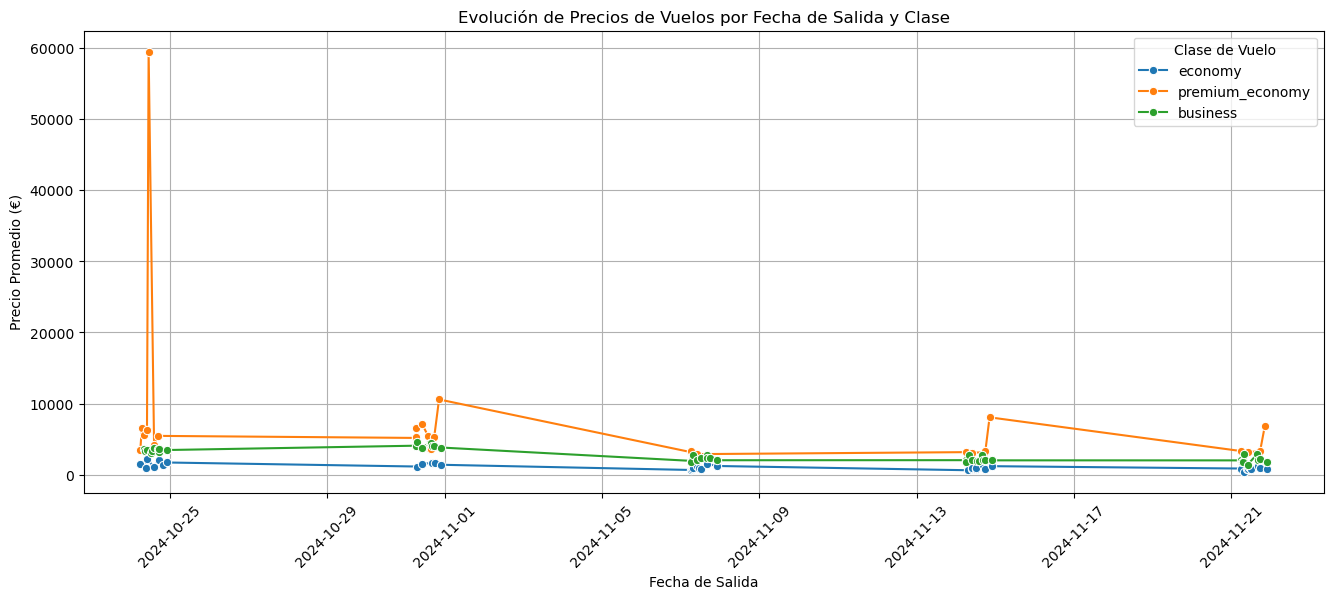

In [45]:
precios_fecha_salida_clase = vuelos.groupby(['fecha_salida_ida', 'clase'])['precio (€)'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=precios_fecha_salida_clase, x="fecha_salida_ida", y="precio (€)", hue="clase", marker="o")
plt.title("Evolución de Precios de Vuelos por Fecha de Salida y Clase")
plt.xlabel("Fecha de Salida")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


1. Pico de Precio en Premium Economy:

- Hay un pico extremo en la clase premium_economy alrededor del 25 de octubre, alcanzando un precio promedio de casi 60,000 €. 
- Este aumento drástico podría deberse a baja disponibilidad o alta demanda en esa fecha específica.
- Posteriormente, los precios en esta clase se estabilizan considerablemente.
2. Tendencia Estable en Economy y Business:

- Las clases economy y business muestran una tendencia mucho más estable en comparación con premium_economy. 
- A lo largo de las fechas, los precios se mantienen en un rango similar y no presentan grandes variaciones. 
- Esto indica que estas clases tienen menos volatilidad en precio, lo cual puede ser atractivo para los viajeros que buscan opciones consistentes.
3. Pequeños Aumentos en Fechas Específicas:

- Observamos ligeros aumentos en premium_economy en otras fechas, como el 1 de noviembre y el 13 de noviembre, aunque ninguno tan extremo como el de finales de octubre.

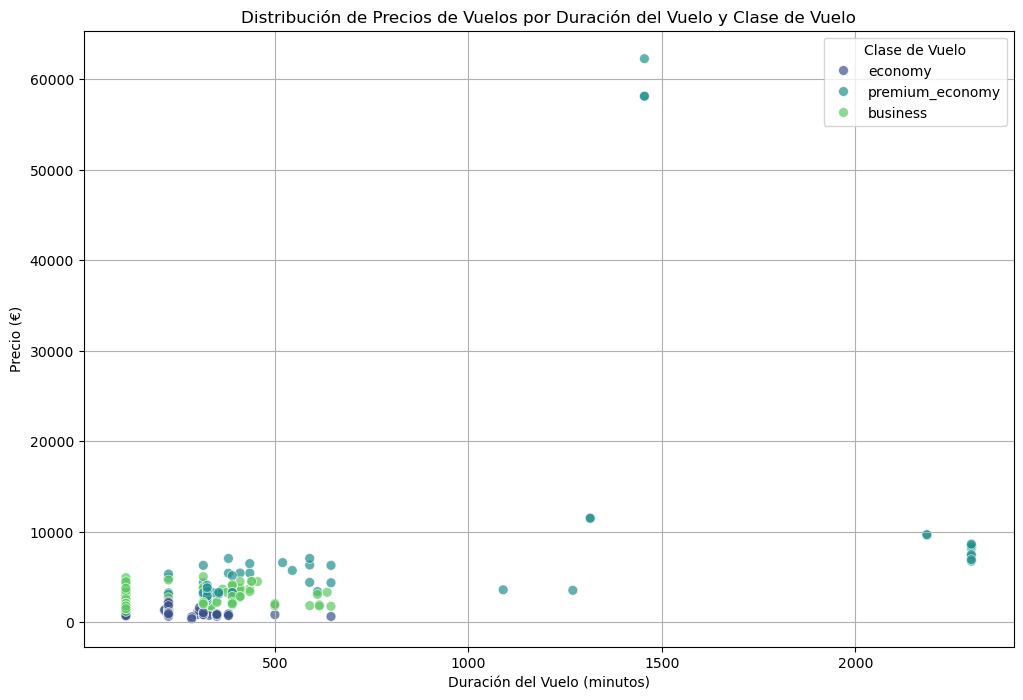

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="clase", palette="viridis", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Clase de Vuelo")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


1. Precios y Duraciones Altas en Clases Premium Economy y Business:

- En la parte superior del gráfico, se observan algunos puntos aislados de premium_economy y business con precios extremadamente altos (alrededor de 60,000 €) y duraciones más largas (cercanas a los 500 minutos o incluso más).
- Esto sugiere que las opciones de estas clases pueden llegar a ser muy costosas en rutas largas o con múltiples escalas.

2. Agrupación de Vuelos de Duración Media (0 - 500 minutos):

- La mayoría de los vuelos se concentran en duraciones de entre 100 y 500 minutos, con precios mucho más bajos, especialmente en la clase economy.
- Esto indica que los vuelos de duración media son generalmente más asequibles y que la clase económica domina en este rango, lo cual es ideal para los viajeros que buscan vuelos cortos y económicos.
3. Variabilidad en Precios para Clases Superiores en Vuelos de Corta y Media Distancia:

- Aunque en su mayoría los vuelos de premium_economy y business en duraciones cortas a medias tienen precios más bajos, hay algunos puntos con precios significativamente más altos en estos rangos.
- Esto podría estar relacionado con la disponibilidad o demanda específica de ciertos horarios o días.

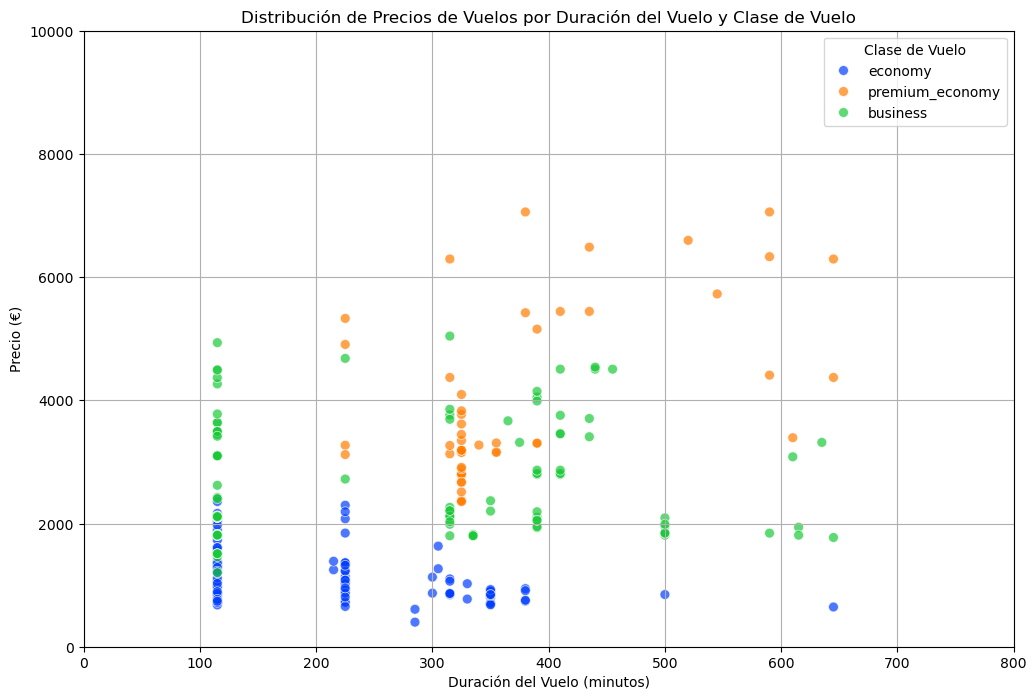

In [50]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="clase", palette="bright", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Clase de Vuelo")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.xlim(0, 800)
plt.ylim(0, 10000)
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


1. Relación entre Precio y Duración:

- A medida que aumenta la duración del vuelo (en minutos), los precios tienden a incrementarse, especialmente en las clases premium_economy (naranja) y business (verde).
- Esto sugiere que los vuelos de mayor duración suelen ser más costosos, lo cual es previsible debido a factores como la distancia y el confort.
2. Economy como Opción Económica:

- La clase economy (azul) se concentra principalmente en precios más bajos, por debajo de los 2,000 €, independientemente de la duración.
- Esto hace que economy sea la opción más accesible para vuelos de distintas duraciones.
3. Variabilidad en Precios para Clases Premium Economy y Business:

- Premium economy y business presentan una mayor variabilidad de precios, especialmente entre los 300 y 500 minutos de duración.
- Esto indica que los precios en estas clases son menos predecibles y pueden variar dependiendo de factores específicos de cada vuelo, como la demanda, disponibilidad y servicios ofrecidos.
4. Picos de Precio en Duraciones Intermedias:

- Observamos algunos puntos altos en premium_economy y business, alrededor de 4,000 a 8,000 €, en vuelos de 300 a 500 minutos. 
- Esto indica que en vuelos de media distancia, los precios pueden elevarse considerablemente en estas clases, posiblemente debido a rutas específicas o alta demanda.

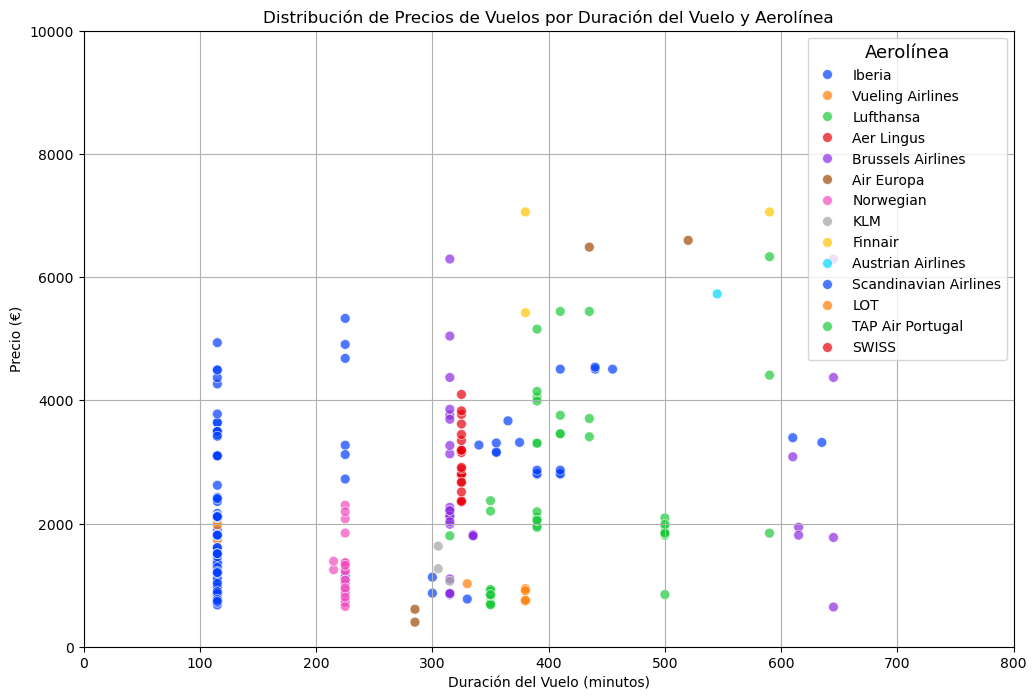

In [55]:
# Scatter plot with reduced legend size and grid enabled
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="aerolínea_ida", palette="bright", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Aerolínea")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.xlim(0, 800)
plt.ylim(0, 10000)
plt.legend(title="Aerolínea", title_fontsize='13', fontsize='10')  # Reduced legend font size
plt.grid(True)
plt.show()


1. Variabilidad de Precios por Aerolínea:

- Algunas aerolíneas, como Iberia (azul) y Norwegian (rosa), muestran precios más accesibles, con la mayoría de sus vuelos por debajo de los 2,000 €.
- Esto sugiere que estas aerolíneas tienden a ser opciones más económicas en diferentes duraciones de vuelo.
- Otras aerolíneas, como Lufthansa (verde) y SWISS (morado), tienen precios más altos en vuelos de duración similar, lo cual puede indicar un enfoque en servicios de mayor calidad o rutas menos directas.
2. Duración de Vuelo y Precios en TAP Air Portugal:

- TAP Air Portugal (naranja) muestra varios puntos con precios altos, especialmente en vuelos de mayor duración (alrededor de 500 a 700 minutos).
- Esto sugiere que los vuelos largos de esta aerolínea pueden ser costosos, posiblemente debido a la naturaleza de sus rutas o a una demanda alta.
3. Aerolíneas con Precios Consistentes en Duraciones Cortas:

- Vueling Airlines y Scandinavian Airlines muestran precios relativamente consistentes para vuelos de menor duración (menos de 300 minutos)
- Esto indica opciones estables para quienes buscan vuelos más cortos y económicos.
4. Picos de Precio en Rutas de Duración Media:

- En vuelos de entre 300 y 500 minutos, aerolíneas como LOT y Lufthansa presentan precios elevados, lo cual puede estar relacionado con la oferta de vuelos de largo alcance en estas compañías.